In [5]:
import sqlite3
import pandas as pd

# Create a connection to the SQLite database
conn = sqlite3.connect('/Users/cris/PycharmProjects/DBL 2 - JBG050/police_data.db')

# Create a DataFrame for each table and print the first few rows

stop_and_search_df = pd.read_sql_query("SELECT * from stop_and_search", conn)



# Close the connection
conn.close()


In [6]:
pas = pd.read_excel('/Users/cris/PycharmProjects/DBL 2 - JBG050/PAS.xlsx', sheet_name='Borough')

pas.head()

,Date,Survey,Borough,Measure,Proportion,MPS,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2014-12-31,PAS,Barking and Dagenham,"""Good Job"" local",0.56,0.67,NaN,NaN,NaN,NaN
1,2014-12-31,PAS,Barnet,"""Good Job"" local",0.67,0.67,NaN,NaN,NaN,NaN
2,2014-12-31,PAS,Bexley,"""Good Job"" local",0.72,0.67,NaN,NaN,NaN,NaN
3,2014-12-31,PAS,Brent,"""Good Job"" local",0.66,0.67,NaN,NaN,NaN,NaN
4,2014-12-31,PAS,Bromley,"""Good Job"" local",0.71,0.67,NaN,NaN,NaN,NaN


In [7]:
pas = pas.drop(columns=['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'])

In [8]:
stop_and_search_df = stop_and_search_df[stop_and_search_df['borough'] != 'city of london']

In [9]:
# Drop columns with 100% null values
stop_and_search_df.drop(['policing_operation', 'outcome_linked_to_object_of_search', 'removal_of_more_than_just_outer_clothing'], axis=1, inplace=True)

# Remove rows with null values in the remaining columns
stop_and_search_df.dropna(inplace=True)

In [10]:

# For stop_and_search_df dataframe
stop_and_search_df['month'] = pd.to_datetime(stop_and_search_df['month'])
stop_and_search_df['Year'] = stop_and_search_df['month'].dt.year
stop_and_search_df['Month'] = stop_and_search_df['month'].dt.month
stop_and_search_df = stop_and_search_df.drop('month', axis=1)

# For pas dataframe
pas['Date'] = pd.to_datetime(pas['Date'])
pas['Year'] = pas['Date'].dt.year
pas['Month'] = pas['Date'].dt.month
pas = pas.drop('Date', axis=1)

# Create sets of (Year, Month) tuples for both datasets
pas_periods = set(zip(pas['Year'], pas['Month']))
stop_and_search_periods = set(zip(stop_and_search_df['Year'], stop_and_search_df['Month']))

# Find intersection to get the overlapping periods
overlap_periods = list(pas_periods.intersection(stop_and_search_periods))

# Filter both datasets to include only records from overlapping periods
pas = pas[pas.set_index(['Year', 'Month']).index.isin(overlap_periods)]
stop_and_search_df = stop_and_search_df[stop_and_search_df.set_index(['Year', 'Month']).index.isin(overlap_periods)]




In [11]:
# convert all borough names to a consistent case (all lowercase)
pas.rename(columns={'Borough': 'borough'}, inplace=True)


pas['borough'] = pas['borough'].str.lower()
stop_and_search_df['borough'] = stop_and_search_df['borough'].str.lower()




In [12]:
pas['borough'] = pas['borough'].replace('city of westminster', 'westminster')


All of the preprocessing above is needed in order to run the code Below

## Plotting Trust Proportion Trends per Borough


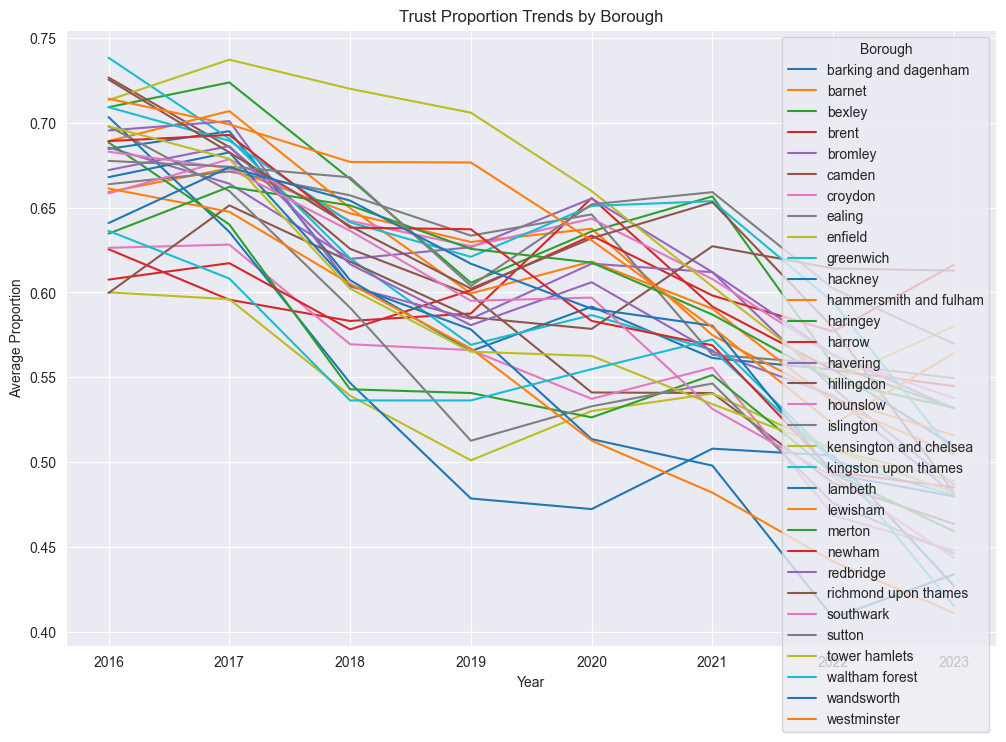

In [14]:

import matplotlib.pyplot as plt
import pandas as pd

# Assume `pas` is preloaded as a DataFrame
fig, ax = plt.subplots(figsize=(12, 8))
for borough in pas['borough'].unique():
    borough_data = pas[pas['borough'] == borough]
    borough_data.groupby('Year')['Proportion'].mean().plot(ax=ax, label=borough)

ax.set_title('Trust Proportion Trends by Borough')
ax.set_xlabel('Year')
ax.set_ylabel('Average Proportion')
ax.legend(title='Borough')
plt.show()


In [15]:
print(set(pas['borough'].values))
print(set(stop_and_search_df['borough'].values))

{'kensington and chelsea', 'southwark', 'ealing', 'islington', 'merton', 'waltham forest', 'barking and dagenham', 'greenwich', 'barnet', 'newham', 'harrow', 'hackney', 'havering', 'bromley', 'hounslow', 'lewisham', 'kingston upon thames', 'camden', 'sutton', 'hillingdon', 'redbridge', 'enfield', 'wandsworth', 'brent', 'westminster', 'haringey', 'tower hamlets', 'lambeth', 'croydon', 'hammersmith and fulham', 'bexley', 'richmond upon thames'}
{'kensington and chelsea', 'southwark', 'merton', 'islington', 'ealing', 'waltham forest', 'barking and dagenham', 'greenwich', 'barnet', 'newham', 'harrow', 'hackney', 'havering', 'lewisham', 'hounslow', 'bromley', 'kingston upon thames', 'camden', 'sutton', 'redbridge', 'hillingdon', 'enfield', 'wandsworth', 'brent', 'westminster', 'haringey', 'tower hamlets', 'lambeth', 'croydon', 'hammersmith and fulham', 'bexley', 'richmond upon thames'}


In [16]:
median_values = pas.groupby('borough')['Proportion'].median()
ymax = median_values.max()
ymin = median_values.min()

print(ymax)


0.745


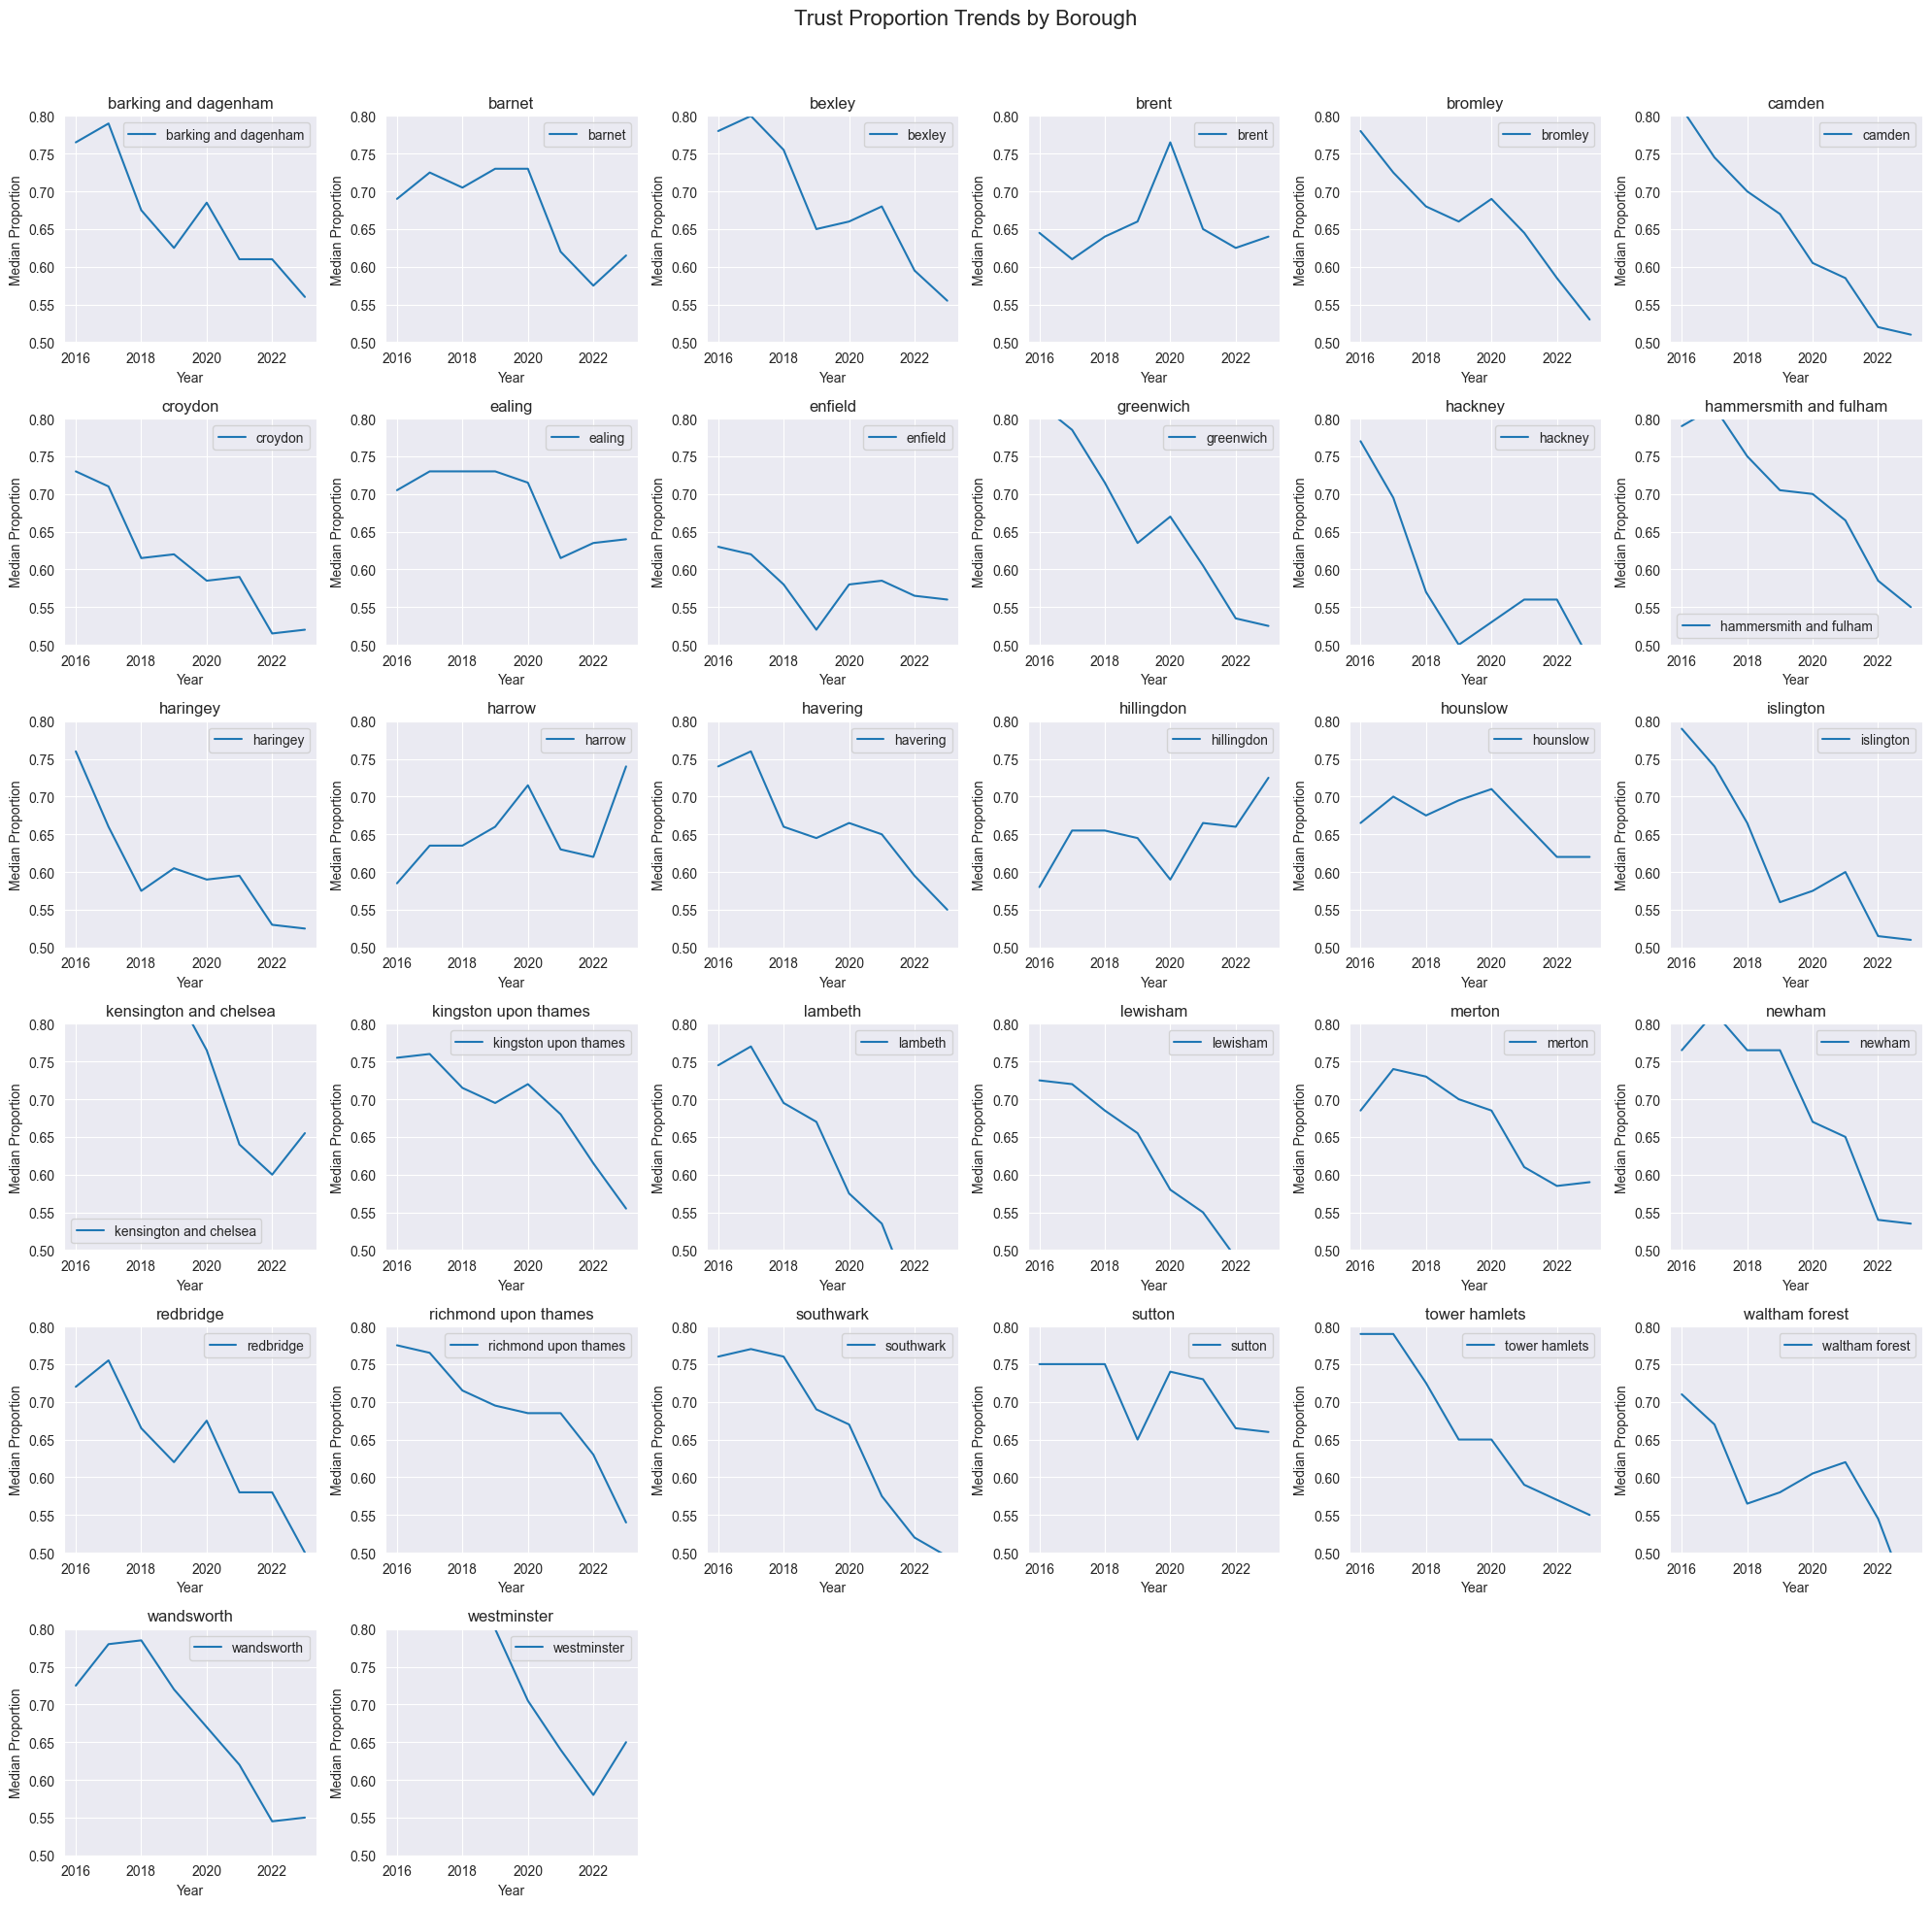

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `combined_agg` is preloaded as a DataFrame and includes the 'Proportion', 'Year', and 'borough' columns

boroughs = pas['borough'].unique()
num_boroughs = len(boroughs)

# Calculate the number of rows and columns for the subplots grid
cols = 6  # You can adjust the number of columns
rows = (num_boroughs // cols) + (num_boroughs % cols > 0)
median_values = pas.groupby('borough')['Proportion'].median()
ymax = median_values.max()
ymin = median_values.min()

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.suptitle('Trust Proportion Trends by Borough', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, borough in enumerate(boroughs):
    borough_data = pas[pas['borough'] == borough]
    borough_data.groupby('Year')['Proportion'].median().plot(ax=axes[i], label=borough)
    axes[i].set_title(borough)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Median Proportion')
    axes[i].legend()
        # Set the same y-axis limits for all plots
    axes[i].set_ylim(0.5, 0.8)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




## Linear Regression of Pas & Stop&Search (predicting proportion)

First Check for overlap between pas dataset and the chosen one for exploration

In [18]:
# Merge the datasets on 'borough', 'Year', and 'Month'
combined_data = pd.merge(pas, stop_and_search_df, on=['borough', 'Year', 'Month'], how='inner')

# Check the output
print(combined_data.head())
print("Number of rows in combined data:", len(combined_data))


#CONSIDER AGGREGATING

# # Aggregating Stop and Search data by outcome counts
# agg_stop_search = stop_and_search_df.groupby(['borough', 'Year', 'Month']).agg({
#     'outcome': pd.Series.value_counts
# }).unstack(fill_value=0).reset_index()
# 
# # Merge aggregated data with PAS
# combined_data_agg = pd.merge(pas, agg_stop_search, on=['borough', 'Year', 'Month'], how='inner')



  Survey               borough           Measure  Proportion   MPS  Year  \
0    PAS  barking and dagenham  "Good Job" local        0.72  0.69  2016   
1    PAS  barking and dagenham  "Good Job" local        0.72  0.69  2016   
2    PAS  barking and dagenham  "Good Job" local        0.72  0.69  2016   
3    PAS  barking and dagenham  "Good Job" local        0.72  0.69  2016   
4    PAS  barking and dagenham  "Good Job" local        0.72  0.69  2016   

   Month                       type part_of_a_policing_operation   latitude  \
0      6             vehicle search                          0.0  51.562793   
1      6              person search                          0.0  51.562793   
2      6  person and vehicle search                          0.0  51.562793   
3      6              person search                          0.0  51.551473   
4      6              person search                          0.0  51.531777   

   longitude gender age_range  \
0   0.169286   male     18-24   
1 

Filter both datasets to include only overlapping sets

In [20]:
print(set(combined_data['Measure'].values))

{'Contact ward officer', 'Treat everyone fairly', '"Good Job" local', 'Understand issues', 'Listen to concerns', 'Informed local', 'Trust MPS', 'Relied on to be there'}


Combine dataframes

How to separate Trust and Confidence:
Trust - Trust MPS , Contact ward officer , Listen to concerns , Treat everyone fairly
Confidence - Good Job Local, Understand issues , Relied on to be there, Informed local 

In [117]:
combined_data.shape

(2717296, 18)

Encode outcome variable & Merge the pas with stop & search

In [156]:
# One-hot encode the 'outcome' variable
outcome_dummies = pd.get_dummies(stop_and_search_df['outcome'], prefix='outcome')
stop_and_search_df_encoded = pd.concat([stop_and_search_df.drop('outcome', axis=1), outcome_dummies], axis=1)

# Aggregate these outcomes by counting occurrences of each outcome type per borough-month
outcome_counts = stop_and_search_df_encoded.groupby(['borough', 'Year', 'Month']).sum().reset_index()

# Merge this aggregated data back with the PAS data
combined_agg = pd.merge(pas, outcome_counts, on=['borough', 'Year', 'Month'], how='inner')


In [134]:
combined_agg.head()

,Survey,borough,Measure,Proportion,MPS,Year,Month,type,part_of_a_policing_operation,latitude,...,outcome_khat or cannabis warning,outcome_local resolution,outcome_nothing found - no further action,outcome_offender cautioned,outcome_offender given drugs possession warning,outcome_offender given penalty notice,outcome_penalty notice for disorder,outcome_summons / charged by post,outcome_suspect arrested,outcome_suspect summonsed to court
0,PAS,barking and dagenham,"""Good Job"" local",0.72,0.69,2016,6,vehicle searchperson searchperson and vehicle ...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,11082.127135,...,0,1,117,0,37,6,0,0,53,1
1,PAS,barnet,"""Good Job"" local",0.67,0.69,2016,6,person and vehicle searchperson and vehicle se...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,8773.008769,...,0,0,106,0,21,5,0,0,32,6
2,PAS,bexley,"""Good Job"" local",0.74,0.69,2016,6,person and vehicle searchperson searchperson s...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,4477.119197,...,0,2,68,0,3,1,0,0,13,0
3,PAS,brent,"""Good Job"" local",0.62,0.69,2016,6,person searchperson and vehicle searchperson s...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,34487.316558,...,0,2,419,0,54,8,0,0,171,15
4,PAS,bromley,"""Good Job"" local",0.69,0.69,2016,6,person searchperson searchperson searchperson ...,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,12747.695415,...,0,9,175,1,14,0,0,0,49,0


Below you can find: combined_agg.columns


In [ ]:
# Index(['Survey', 'borough', 'Measure', 'Proportion', 'MPS', 'Year', 'Month',
#        'type', 'part_of_a_policing_operation', 'latitude', 'longitude',
#        'gender', 'age_range', 'self_defined_ethnicity',
#        'officer_defined_ethnicity', 'legislation', 'object_of_search',
#        'outcome_a no further action disposal', 'outcome_arrest',
#        'outcome_article found - detailed outcome unavailable',
#        'outcome_caution (simple or conditional)',
#        'outcome_community resolution', 'outcome_khat or cannabis warning',
#        'outcome_local resolution', 'outcome_nothing found - no further action',
#        'outcome_offender cautioned',
#        'outcome_offender given drugs possession warning',
#        'outcome_offender given penalty notice',
#        'outcome_penalty notice for disorder',
#        'outcome_summons / charged by post', 'outcome_suspect arrested',
#        'outcome_suspect summonsed to court'],
#       dtype='object')

In [129]:

       
       
import statsmodels.api as sm


selected_outcomes = [
    'outcome_a no further action disposal', 'outcome_arrest',
       'outcome_article found - detailed outcome unavailable',
       'outcome_caution (simple or conditional)',
       'outcome_community resolution', 'outcome_khat or cannabis warning',
       'outcome_local resolution', 'outcome_nothing found - no further action',
       'outcome_offender cautioned',
       'outcome_offender given drugs possession warning',
       'outcome_offender given penalty notice',
       'outcome_penalty notice for disorder',
       'outcome_summons / charged by post', 'outcome_suspect arrested',
       'outcome_suspect summonsed to court'
]

# Prepare the independent variables (outcomes) and add a constant term for intercept
# X = combined_agg.drop(columns=['Survey', 'Measure', 'Proportion', 'MPS', 'borough', 'Year', 'Month'])
X = combined_agg[selected_outcomes]
X = sm.add_constant(X)  # adding a constant


#  dependent variable
y = combined_agg['Proportion']

# Fit  model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Proportion   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     25.78
Date:                Mon, 13 May 2024   Prob (F-statistic):           3.81e-71
Time:                        21:04:49   Log-Likelihood:                 1472.5
No. Observations:                7520   AIC:                            -2913.
Df Residuals:                    7504   BIC:                            -2802.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Check if you can compute R2 for sarimax

In [126]:
print(len(set(pas['borough'].values)))

32


## Important Think about using legislation and object of search

## AR & ARIMA models for our datasets

In [138]:
combined_agg

Survey  borough             Measure  Proportion   MPS  \
Year Month                                                         
2016 6        PAS   barnet    "Good Job" local        0.67  0.69   
     6        PAS   bexley    "Good Job" local        0.74  0.69   
     6        PAS    brent    "Good Job" local        0.62  0.69   
     6        PAS  bromley    "Good Job" local        0.69  0.69   
     6        PAS   camden    "Good Job" local        0.69  0.69   
...           ...      ...                 ...         ...   ...   
     6        PAS    brent  Listen to concerns        0.66  0.74   
     6        PAS  bromley  Listen to concerns        0.77  0.74   
     6        PAS   camden  Listen to concerns        0.82  0.74   
     6        PAS  croydon  Listen to concerns        0.74  0.74   
     6        PAS   ealing  Listen to concerns        0.71  0.74   

                                                         type  \
Year Month                                                      
2016 6      person and vehicle searchperson and vehicle se...   
     6      person and vehicle searchperson searchperson s...   
     6      person searchperson and vehicle searchperson s...   
     6      person searchperson searchperson searchperson ...   
     6      person searchperson searchperson searchperson ...   
...                                                       ...   
     6      person searchperson and vehicle searchperson s...   
     6      person searchperson searchperson searchperson ...   
     6      person searchperson searchperson searchperson ...   
     6      person searchperson searchperson searchperson ...   
     6      person and vehicle searchperson and vehicle se...   

                                 part_of_a_policing_operation      latitude  \
Year Month                                                                    
2016 6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...   8773.008769   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...   4477.119197   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  34487.316558   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  12747.695415   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  18089.593005   
...                                                       ...           ...   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  34487.316558   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  12747.695415   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  18089.593005   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  10943.783451   
     6      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...  12415.389846   

             longitude                                             gender  \
Year Month                                                                  
2016 6      -36.910779  malemalemalemalemalemalemalemalemalemalemalema...   
     6       12.037471  malemalemalemalemalemalemalefemalefemalefemale...   
     6     -173.602749  malemalemalemalemalemalemalemalemalemalemalema...   
     6        3.177743  malemalemalemalemalemalemalemalemalemalemalema...   
     6      -49.590342  malemalemalemalemalemalemalemalemalemalemalema...   
...                ...                                                ...   
     6     -173.602749  malemalemalemalemalemalemalemalemalemalemalema...   
     6        3.177743  malemalemalemalemalemalemalemalemalemalemalema...   
     6      -49.590342  malemalemalemalemalemalemalemalemalemalemalema...   
     6      -20.912920  malemalemalemalemalemalemalemalemalemalemalema...   
     6      -80.616878  malemalemalemalemalemalemalemalemalemalemalema...   

            ... outcome_khat or cannabis warning_lag_1  \
Year Month  ...                                          
2016 6      ...                                    0.0   
     6      ...                                    0.0   
     6      ...   

(7519, 31)
(7519,)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7519 entries, (2016, 6) to (2023, 12)
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   MPS                                                         7519 non-null   float64
 1   outcome_a no further action disposal                        7519 non-null   int64  
 2   outcome_arrest                                              7519 non-null   int64  
 3   outcome_article found - detailed outcome unavailable        7519 non-null   int64  
 4   outcome_caution (simple or conditional)                     7519 non-null   int64  
 5   outcome_community resolution                                7519 non-null   int64  
 6   outcome_khat or cannabis warning                            7519 non-null   int64  
 7   outcome_local resolution                              

/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(7517, 61)
(7517,)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7517 entries, (2016, 6) to (2023, 12)
Data columns (total 61 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   MPS                                                         7517 non-null   float64
 1   outcome_a no further action disposal                        7517 non-null   int64  
 2   outcome_arrest                                              7517 non-null   int64  
 3   outcome_article found - detailed outcome unavailable        7517 non-null   int64  
 4   outcome_caution (simple or conditional)                     7517 non-null   int64  
 5   outcome_community resolution                                7517 non-null   int64  
 6   outcome_khat or cannabis warning                            7517 non-null   int64  
 7   outcome_local resolution                              

/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


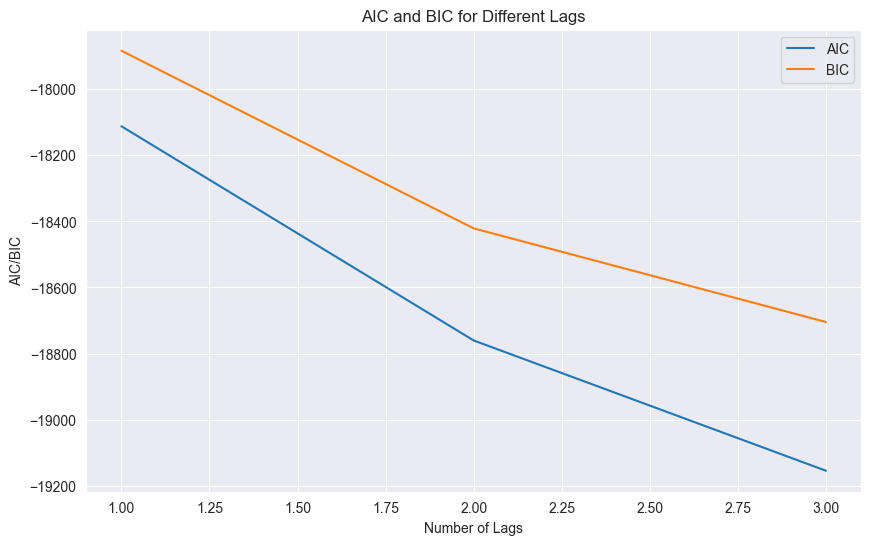

Optimal number of lags: 3
MPS                                                     float64
outcome_a no further action disposal                      int64
outcome_arrest                                            int64
outcome_article found - detailed outcome unavailable      int64
outcome_caution (simple or conditional)                   int64
                                                         ...   
outcome_offender given penalty notice_lag_3             float64
outcome_penalty notice for disorder_lag_3               float64
outcome_summons / charged by post_lag_3                 float64
outcome_suspect arrested_lag_3                          float64
outcome_suspect summonsed to court_lag_3                float64
Length: 61, dtype: object


/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Proportion   No. Observations:                 6013
Model:               SARIMAX(3, 1, 0)   Log Likelihood                7779.763
Date:                Tue, 14 May 2024   AIC                         -15429.527
Time:                        17:25:37   BIC                         -14993.961
Sample:                             0   HQIC                        -15278.280
                               - 6013                                         
Covariance Type:                  opg                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
MPS                                                            1.1657      0.019     62.100      0.000       1.129

/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [157]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Assuming combined_agg is the merged dataset from previous steps
combined_agg.set_index(['Year', 'Month'], inplace=True)

# Focus on the Proportion column (trust level) for ARIMAX models
trust_series = combined_agg['Proportion']

# Selected outcomes to include as lagged variables
selected_outcomes = [
    'outcome_a no further action disposal', 'outcome_arrest',
    'outcome_article found - detailed outcome unavailable',
    'outcome_caution (simple or conditional)',
    'outcome_community resolution', 'outcome_khat or cannabis warning',
    'outcome_local resolution', 'outcome_nothing found - no further action',
    'outcome_offender cautioned',
    'outcome_offender given drugs possession warning',
    'outcome_offender given penalty notice',
    'outcome_penalty notice for disorder',
    'outcome_summons / charged by post', 'outcome_suspect arrested',
    'outcome_suspect summonsed to court'
]

# Create lagged features for the selected outcomes and trust_series
def create_lagged_features(df, lags):
    lagged_df = df.copy()
    for lag in range(1, lags + 1):
        lagged_df[f'Proportion_lag_{lag}'] = df['Proportion'].shift(lag)
        for outcome in selected_outcomes:
            lagged_df[f'{outcome}_lag_{lag}'] = df[outcome].shift(lag)
    return lagged_df

# Determine the optimal number of lags using AIC/BIC
aic_values = []
bic_values = []
lags_range = range(1, 4)  # Example: test lags from 1 to 3 months

for lag in lags_range:
    lagged_data = create_lagged_features(combined_agg, lag).dropna()
    y = lagged_data['Proportion']
    X = lagged_data.drop(columns=['Proportion'] +['MPS'] + ['latitude'] +['longitude'] + [f'Proportion_lag_{i}' for i in range(1, lag + 1)])
    # Remove non-numeric columns
    X = X.select_dtypes(include=[np.number])
    
    
    print(X.shape)
    print(y.shape)
    print(X.info(verbose=True))
    
    # Convert data to numpy arrays
    y = np.asarray(y).astype(np.float64)
    X = np.asarray(X).astype(np.float64)
    
    # Fit SARIMAX model
    model = SARIMAX(y, exog=X, order=(lag, 1, 0), enforce_stationarity=False, enforce_invertibility=False)
    results = model.fit(disp=False)
    
    aic_values.append(results.aic)
    bic_values.append(results.bic)

# Plotting AIC and BIC
plt.figure(figsize=(10, 6))
plt.plot(lags_range, aic_values, label='AIC')
plt.plot(lags_range, bic_values, label='BIC')
plt.xlabel('Number of Lags')
plt.ylabel('AIC/BIC')
plt.title('AIC and BIC for Different Lags')
plt.legend()
plt.show()

# Selecting the optimal number of lags based on the minimum AIC/BIC
optimal_lag = lags_range[aic_values.index(min(aic_values))]
print(f'Optimal number of lags: {optimal_lag}')

# Create the final lagged dataset with optimal lags
lagged_data = create_lagged_features(combined_agg, optimal_lag).dropna()
y = lagged_data['Proportion']
X = lagged_data.drop(columns=['Proportion'] +['MPS'] + ['latitude'] + ['longitude']+ [f'Proportion_lag_{i}' for i in range(1, optimal_lag + 1)])
X = X.select_dtypes(include=[np.number])

print(X.dtypes)

# Splitting the data into train and test sets
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

# Convert data to numpy arrays
y_train = np.asarray(y_train).astype(np.float64)
X_train = np.asarray(X_train).astype(np.float64)
y_test = np.asarray(y_test).astype(np.float64)
X_test = np.asarray(X_test).astype(np.float64)

# Fit final SARIMAX model with optimal lags
final_model = SARIMAX(y_train, exog=X_train, order=(optimal_lag, 1, 0), enforce_stationarity=False, enforce_invertibility=False)
final_results = final_model.fit(disp=False)
print(final_results.summary())

# Making predictions with exogenous variables
predictions = final_results.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test, dynamic=False)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Final SARIMAX Model MSE: {mse}')


## VAR Model

We first need to run the combined agg thing

In [162]:
# Merge this aggregated data back with the PAS data
combined_agg = pd.merge(pas, outcome_counts, on=['borough', 'Year', 'Month'], how='inner')


In [167]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Merge this aggregated data back with the PAS data
combined_agg = pd.merge(pas, outcome_counts, on=['borough', 'Year', 'Month'], how='inner')


# Assuming combined_agg is the merged dataset from previous steps
combined_agg.set_index(['Year', 'Month'], inplace=True)

# Create a datetime index from the 'Year' and 'Month' MultiIndex
combined_agg.index = pd.to_datetime(combined_agg.index.map(lambda x: f'{x[0]}-{x[1]:02d}'))




selected_outcomes = [
    'outcome_a no further action disposal', 'outcome_arrest',
    'outcome_article found - detailed outcome unavailable',
    'outcome_caution (simple or conditional)',
    'outcome_community resolution', 'outcome_khat or cannabis warning',
    'outcome_local resolution', 'outcome_nothing found - no further action',
    'outcome_offender cautioned',
    'outcome_offender given drugs possession warning',
    'outcome_offender given penalty notice',
    'outcome_penalty notice for disorder',
    'outcome_summons / charged by post', 'outcome_suspect arrested',
    'outcome_suspect summonsed to court'
]

# Select relevant columns for the VAR model
columns = ['Proportion'] + selected_outcomes
data = combined_agg[columns].dropna()

# Fit VAR model
model = VAR(data)
lag_order = model.select_order(maxlags=8)

# Fit the model with the optimal lag order
var_model = model.fit(lag_order.aic)

# Forecasting
# Predicting the next 2 steps
forecast_steps = 4
forecast = var_model.forecast(data.values[-lag_order.aic:], steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=columns)
# Evaluate the model
# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit the model on the training data
var_model_train = model.fit(lag_order.aic)

# Forecast on the test data
forecast_test = var_model_train.forecast(train.values[-lag_order.aic:], steps=len(test))
forecast_test_df = pd.DataFrame(forecast_test, index=test.index, columns=columns)

# Calculate MSE
mse = mean_squared_error(test['Proportion'], forecast_test_df['Proportion'])
print(f'VAR Model MSE: {mse}')


/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/cris/PycharmProjects/JBG040-Group15/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


VAR Model MSE: 0.03880334081730941


## Something else

Correlation Matrix

In [170]:
print(combined_agg.dtypes)

Survey                                                   object
borough                                                  object
Measure                                                  object
Proportion                                              float64
MPS                                                     float64
Year                                                      int32
Month                                                     int32
type                                                     object
part_of_a_policing_operation                             object
latitude                                                float64
longitude                                               float64
gender                                                   object
age_range                                                object
self_defined_ethnicity                                   object
officer_defined_ethnicity                                object
legislation                             

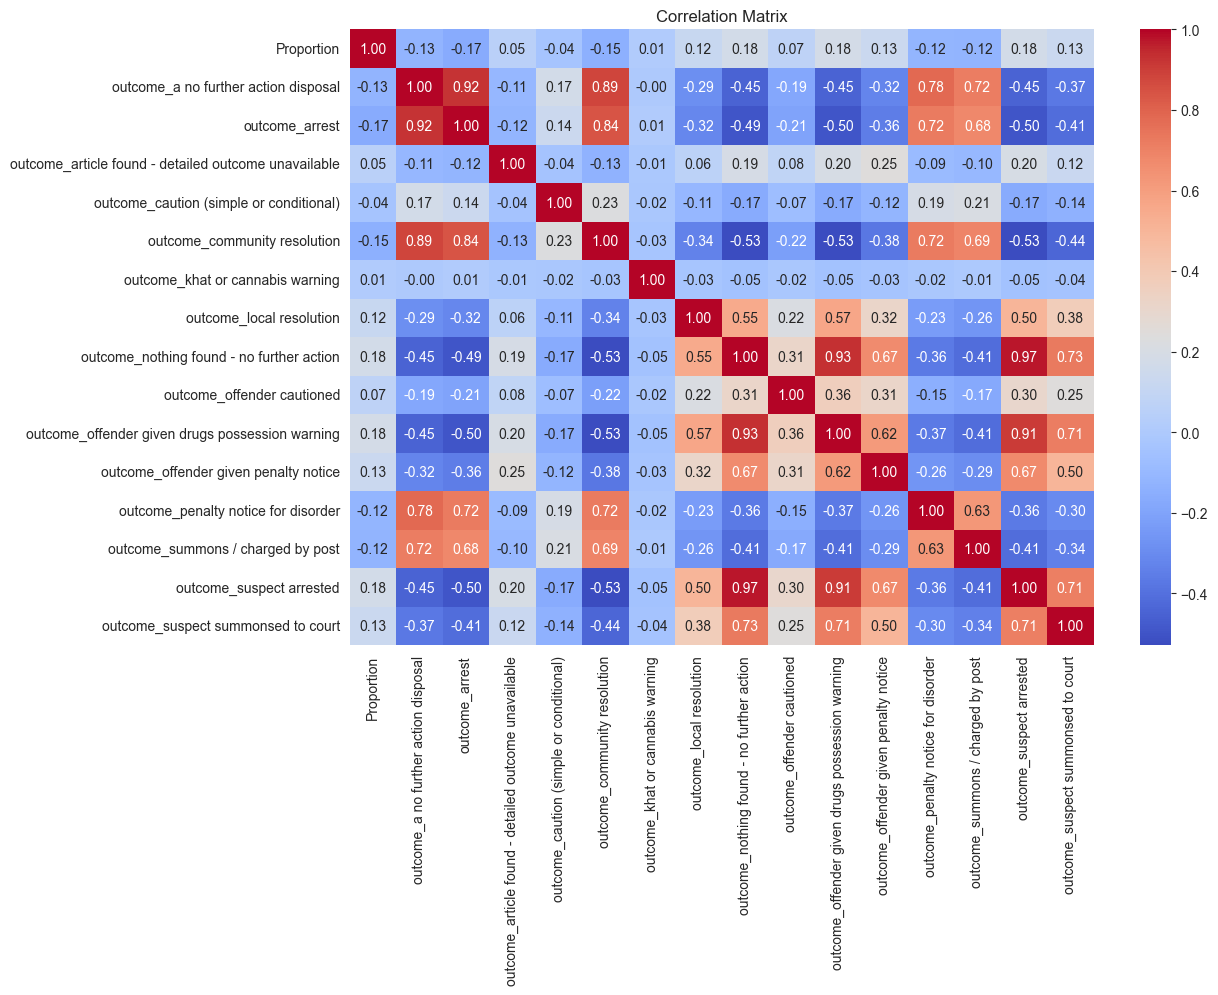

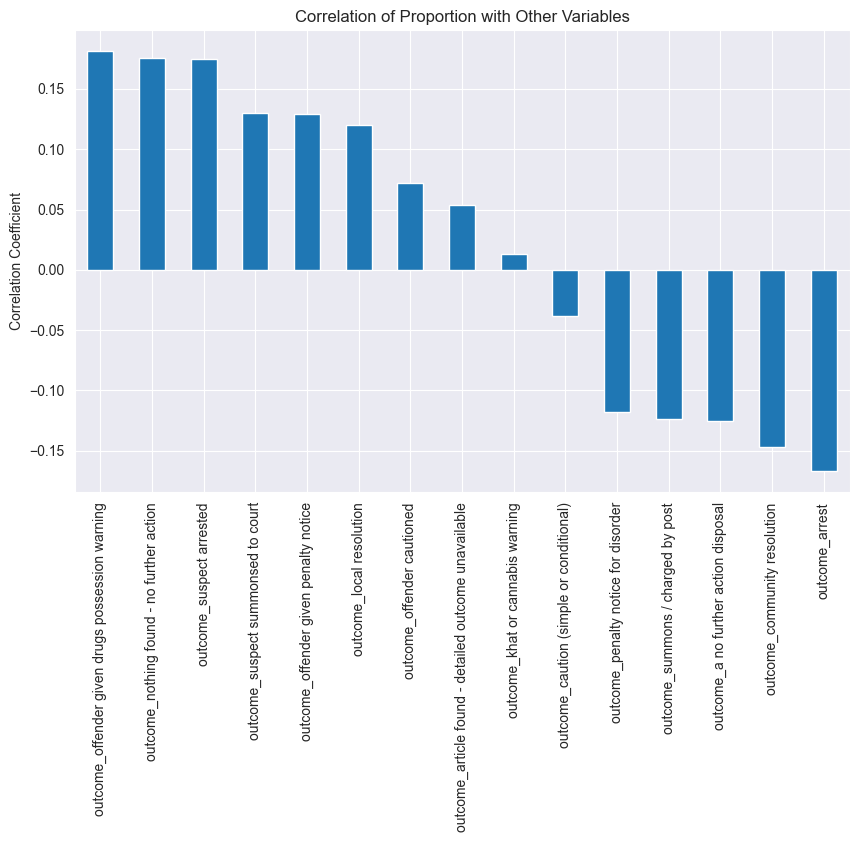

Proportion                                              1.000000
outcome_offender given drugs possession warning         0.181131
outcome_nothing found - no further action               0.175296
outcome_suspect arrested                                0.175173
outcome_suspect summonsed to court                      0.129871
outcome_offender given penalty notice                   0.129210
outcome_local resolution                                0.119981
outcome_offender cautioned                              0.071640
outcome_article found - detailed outcome unavailable    0.053592
outcome_khat or cannabis warning                        0.013006
outcome_caution (simple or conditional)                -0.037930
outcome_penalty notice for disorder                    -0.117658
outcome_summons / charged by post                      -0.123315
outcome_a no further action disposal                   -0.125580
outcome_community resolution                           -0.146495
outcome_arrest           

In [172]:
import seaborn as sns

combined_agg = pd.merge(pas, outcome_counts, on=['borough', 'Year', 'Month'], how='inner')
combined_agg = combined_agg.select_dtypes(include=[np.number])

combined_agg = combined_agg.drop(columns=['Year']+['Month'] +['MPS'] + ['latitude'] +['longitude'])


# Calculate the correlation matrix
corr_matrix = combined_agg.corr()



# Extract the correlation of 'Proportion' with other variables
proportion_corr = corr_matrix['Proportion'].sort_values(ascending=False)

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plotting correlation of 'Proportion' with other variables
plt.figure(figsize=(10, 6))
proportion_corr.drop('Proportion').plot(kind='bar')
plt.title('Correlation of Proportion with Other Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

print(proportion_corr)


In [84]:
# import pandas as pd
# 
# # Compute the total number of searches and arrests to ensure accurate calculation of the arrest rate
# arrest_data = stop_and_search_df.groupby(['borough', 'Year', 'Month']).agg(
#     total_searches=pd.NamedAgg(column='outcome', aggfunc='size'),  # This counts the number of rows in each group
#     arrests=pd.NamedAgg(column='outcome', aggfunc=lambda x: (x == 'Arrest').sum())
# ).reset_index()
# 
# # Calculate the arrest rate by dividing the number of arrests by the total number of searches
# arrest_data['arrest_rate'] = arrest_data['arrests'] / arrest_data['total_searches']
# 
# # Drop columns we don't need after calculation to avoid clutter
# arrest_data.drop(columns=['total_searches', 'arrests'], inplace=True)
# 
# # Merge arrest data with PAS data on Borough, Year, and Month
# combined_data = pd.merge(pas, arrest_data, left_on=['Borough', 'Year', 'Month'], right_on=['borough', 'Year', 'Month'], how='left')
# 
# # Handle missing arrest rates assuming no arrests if data is missing
# combined_data['arrest_rate'] = combined_data['arrest_rate'].fillna(0)
# 
# print(combined_data['arrest_rate'].nunique())  # Check how many unique arrest rates there are
# 
# 
# print(pas[['Year', 'Month']].drop_duplicates().sort_values(by=['Year', 'Month']))
# print(stop_and_search_df[['Year', 'Month']].drop_duplicates().sort_values(by=['Year', 'Month']))
# 
# 
# # Define a function to calculate correlation within each borough, only if there's sufficient data variability
# def calculate_correlation(group):
#     if len(group['arrest_rate'].unique()) > 1:  # Ensure there is variation in arrest rates
#         return group[['Proportion', 'arrest_rate']].corr().iloc[0, 1]
#     return None  # Return None if no variation to compute correlation
# 
# borough_correlation = combined_data.groupby('Borough').apply(calculate_correlation)
# print(borough_correlation)


1
      Year  Month
0     2014     12
224   2015      3
448   2015      6
672   2015      9
896   2015     12
1120  2016      3
1344  2016      6
1568  2016      9
1792  2016     12
2016  2017      3
2240  2017      6
2464  2017      9
2688  2017     12
2912  2018      3
3136  2018      6
3360  2018      9
3584  2018     12
3808  2019      3
4032  2019      6
4256  2019      9
4480  2019     12
4704  2020      3
4928  2020      6
5152  2020      9
5376  2020     12
5600  2021      3
5824  2021      6
6048  2021      9
6272  2021     12
6496  2022      3
7520  2022      6
7776  2022      9
8032  2022     12
8288  2023      3
8544  2023      6
8800  2023      9
9056  2023     12
         Year  Month
0        2016      5
13       2016      6
9636     2016      7
20665    2016      8
31436    2016      9
...       ...    ...
1287061  2023      9
1297868  2023     10
1308378  2023     11
1316572  2023     12
1324744  2024      1

[92 rows x 2 columns]
Empty DataFrame
Columns: []
Index: []


/var/folders/j3/c6lj_2051kdcm9d4lrwsyf0r0000gn/T/ipykernel_8175/3034698605.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  borough_correlation = combined_data.groupby('Borough').apply(calculate_correlation)
